In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'C:\Users\SAGNEEK SENGUPTA\Documents\Transformer fault\DGA_dataset.csv')

In [3]:
# Separate features and target
X = dataset[['H2', 'CH4', 'C2H6', 'C2H4', 'C2H2']]
y = dataset['Type']

In [4]:
# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
# Normalize/Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Outputs to verify
data_shapes = {
    "X_train_shape": X_train_scaled.shape,
    "X_val_shape": X_val_scaled.shape,
    "X_test_shape": X_test_scaled.shape,
    "y_train_classes": len(set(y_train)),
    "y_test_classes": len(set(y_test))
}

In [8]:
data_shapes

{'X_train_shape': (140, 5),
 'X_val_shape': (30, 5),
 'X_test_shape': (31, 5),
 'y_train_classes': 7,
 'y_test_classes': 7}

In [9]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Evaluate the model on validation data
y_val_pred = rf_classifier.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.7333333333333333


In [11]:
# Evaluate on test data
y_test_pred = rf_classifier.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Classification Report:
                                     precision    recall  f1-score   support

                     Arc discharge       0.67      0.80      0.73        10
      High-temperature overheating       0.80      0.57      0.67         7
       Low-temperature overheating       1.00      1.00      1.00         1
Low/Middle-temperature overheating       0.00      0.00      0.00         1
    Middle-temperature overheating       0.00      0.00      0.00         1
                 Partial discharge       0.67      1.00      0.80         2
                   Spark discharge       0.78      0.78      0.78         9

                          accuracy                           0.71        31
                         macro avg       0.56      0.59      0.57        31
                      weighted avg       0.70      0.71      0.69        31



c:\Users\SAGNEEK SENGUPTA\Documents\Transformer fault\transformer\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SAGNEEK SENGUPTA\Documents\Transformer fault\transformer\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SAGNEEK SENGUPTA\Documents\Transformer fault\transformer\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [12]:
# Feature importance analysis
feature_importances = rf_classifier.feature_importances_
features = ['H2', 'CH4', 'C2H6', 'C2H4', 'C2H2']

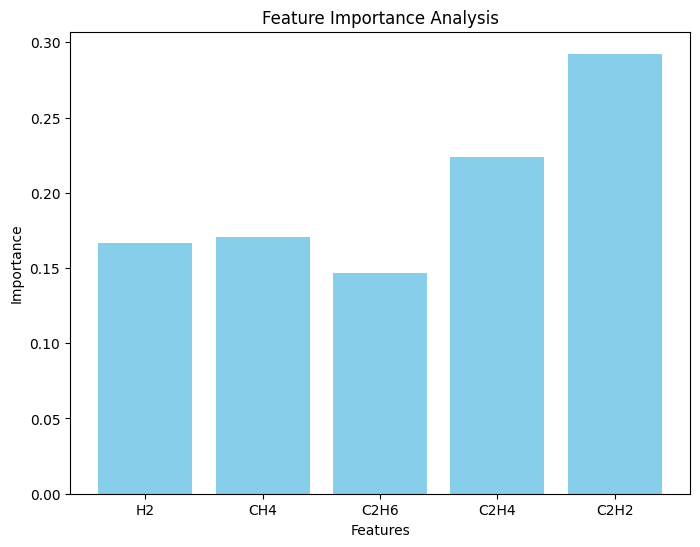

In [13]:
# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(features, feature_importances, color='skyblue')
plt.title('Feature Importance Analysis')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [14]:
# Outputs to verify
data_shapes = {
    "X_train_shape": X_train_scaled.shape,
    "X_val_shape": X_val_scaled.shape,
    "X_test_shape": X_test_scaled.shape,
    "y_train_classes": len(set(y_train)),
    "y_test_classes": len(set(y_test))
}

val_accuracy, data_shapes

(0.7333333333333333,
 {'X_train_shape': (140, 5),
  'X_val_shape': (30, 5),
  'X_test_shape': (31, 5),
  'y_train_classes': 7,
  'y_test_classes': 7})